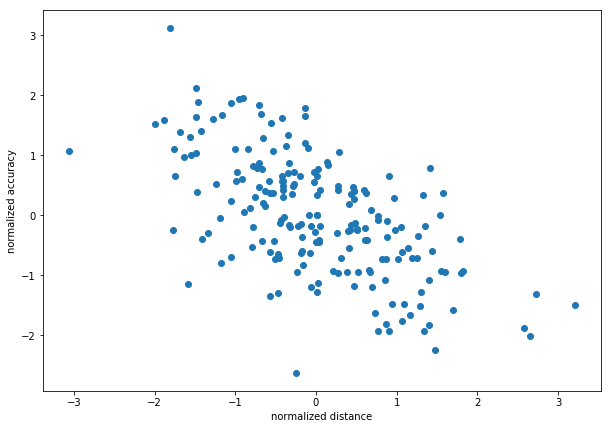

In [1]:
import pandas
import matplotlib.pyplot as plt

# Read data from csv
pga = pandas.read_csv("pga.csv")

# Normalize the data
pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()

plt.figure(figsize=(10,7))
plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()

In [2]:
pga.head()

,distance,accuracy
0,0.314379,-0.707727
1,1.693777,-1.586669
2,-0.059695,-0.176699
3,-0.574047,0.372640
4,1.343083,-1.934584


#### Use the sklearn class LinearRegression and assign the coefficient of distance

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

# We can add a dimension to an array by using np.newaxis
print("Shape of the series:", pga.distance.shape)
print("Shape with newaxis:", pga.distance[:, np.newaxis].shape)

# The X variable in LinearRegression.fit() must have 2 dimensions
lr = LinearRegression()
lr.fit(pga[["distance"]],pga["accuracy"])
theta1 = lr.coef_[0]

theta1


Shape of the series: (197,)
Shape with newaxis: (197, 1)


-0.60759882271512167

#### The cost function of a single variable linear model

In [4]:

def cost(theta0, theta1, x, y):
    # Initialize cost
    J = 0
    # The number of observations
    m = len(x)
    # Loop through each observation
    for i in range(m):
        # Compute the hypothesis 
        h = theta1 * x[i] + theta0
        # Add to cost
        J += (h - y[i])**2
    # Average and normalize cost
    J /= (2*m)
    return J

# The cost for theta0=0 and theta1=1
print(cost(0, 1, pga.distance, pga.accuracy))


1.5994384226


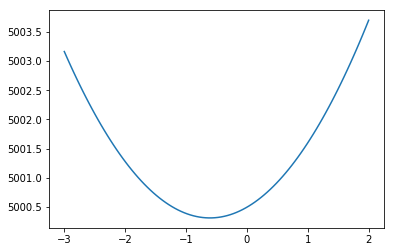

In [5]:

theta0 = 100
theta1s = np.linspace(-3,2,100)

y = [cost(theta0,theta1, pga.distance, pga.accuracy) for theta1 in theta1s]

plt.plot(theta1s,y)
plt.show()

The cost function above is quadratic, like a parabola, with respect to the slope and we can see there is a global minimum. A global minimum is the point where the function has the lowest value. We need to find the best set of parameters to minimize the cost function, but here we are only varying the slope and keeping the intercept constant. The minimum of the cost function is the point where the model has the lowest error, hence the point where our parameters are optimized. Instead we can use a 3D plot to visualize this cost function where the x and y axis will be the slope and intercept and the z axis will be the cost.

#### Make a 3D surface plot with theta0s on the x-axis, theta1s on the y-axis, and the corresponding cost on the z-axis

[[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]] 
 [[-10.         -10.         -10.         -10.         -10.        ]
 [ -9.7979798   -9.7979798   -9.7979798   -9.7979798   -9.7979798 ]
 [ -9.5959596   -9.5959596   -9.5959596   -9.5959596   -9.5959596 ]
 [ -9.39393939  -9.39393939  -9.39393939  -9.39393939  -9.39393939]
 [ -9.19191919  -9.19191919  -9.19191919  -9.19191919  -9.19191919]]


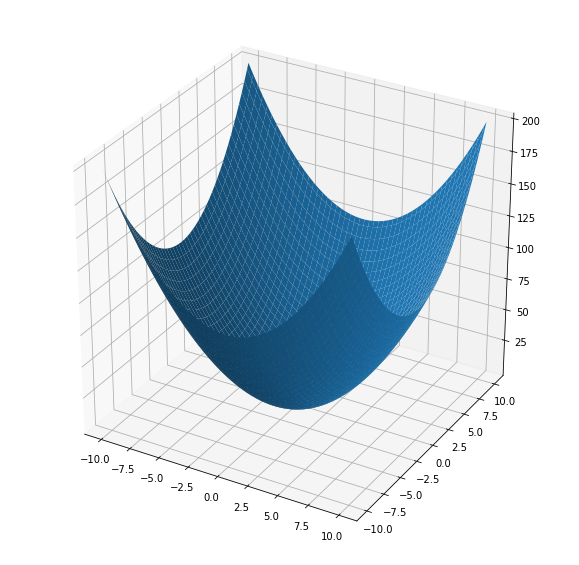

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Example of a Surface Plot using Matplotlib
# Create x an y variables
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

# We must create variables to represent each possible pair of points in x and y
# ie. (-10, 10), (-10, -9.8), ... (0, 0), ... ,(10, 9.8), (10,9.8)
# x and y need to be transformed to 100x100 matrices to represent these coordinates
# np.meshgrid will build a coordinate matrices of x and y
X, Y = np.meshgrid(x,y)
print(X[:5,:5],"\n",Y[:5,:5])

# Compute a 3D parabola 
Z = X**2 + Y**2 

# Open a figure to place the plot on
fig = plt.figure(figsize=(10,10))
# Initialize 3D plot
ax = fig.gca(projection='3d')
# Plot the surface
ax.plot_surface(X=X,Y=Y,Z=Z)

plt.show()



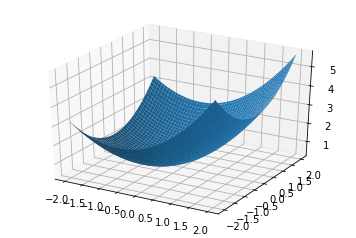

In [7]:

theta0s = np.linspace(-2,2,100)
theta1s = np.linspace(-2,2, 100)
COST = np.empty(shape=(100,100))

T0S, T1S = np.meshgrid(theta0s, theta1s)
# for each parameter combination compute the cost
for i in range(100):
    for j in range(100):
        COST[i,j] = cost(T0S[0,i], T1S[j,0], pga.distance, pga.accuracy)

# make 3d plot
fig2 = plt.figure()
ax = fig2.gca(projection='3d')
ax.plot_surface(X=T0S,Y=T1S,Z=COST)
plt.show()

Gradient descent relies on finding the direction of the largest gradient where a gradient is the "slope" of a multivariable function. To find this gradient we can take the partial derivative in terms of each parameter in the cost function. A partial derivative represents the slope of a multivariable function in terms of a single parameter, ie. holding all other variables constant, what is the slope in the direction of the one parameter. In the case of this cost function, we will take the partial derivatives in terms of theta0 and theta1. Visually, looking at the 3D plot above, we want to find the slope of the function in the direction either the x or y axis. If you are not familiar with derivatives do not worry, we will not require you to derive any in this lesson. Most importantly we must remember that we are just finding the incline of a function relative to each parameter.

∂J(θ0,θ1)∂θ0 is read as the partial derivative of J(θ0,θ1) in terms of θ0. This is not part of the equation but just the representation of partial derivatives.

The partial derivative of the cost function in terms of theta0 is: ∂J(θ0,θ1)∂θ0=1m∑i=1m(hθ(xi)−yi).

The partial deriviate of the cost function in terms of theta1 is: ∂J(θ1)∂θ1=1m∑i=1m(hθ(xi)−yi)∗xi
We've written the code to compute the partial derivative in terms of theta1 below. theta0 and theta1 are inputs to the function to give a reference point of where to take the derivative from. x is our feature vector and y are the observed, target, values. We then find the error between our observations and hypothesised model and multiply by x. The average of all these terms is then the partial derivative. This function gives us the slope in the direction of the θ1 coefficient.

In [8]:
def partial_cost_theta1(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    # Hypothesis minus observed times x
    diff = (h - y) * x
    # Average to compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial1 = partial_cost_theta1(0, 5, pga.distance, pga.accuracy)
print("partial1 =", partial1)


def partial_cost_theta0(theta0, theta1, x, y):
    # Hypothesis
    h = theta0 + theta1*x
    
    diff = (h - y) 
    # Average to compute partial derivative
    partial = diff.sum() / (x.shape[0])
    return partial

partial0 = partial_cost_theta0(1, 1, pga.distance, pga.accuracy)
print("partial1 =", partial1)

partial1 = 5.5791338540718955
partial1 = 5.5791338540718955


#### Execute the gradient descent algorithm

Theta1 = -0.6046983166379609


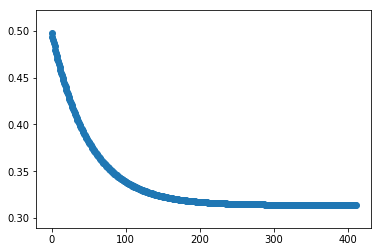

In [9]:
# x is our feature vector -- distance
# y is our target variable -- accuracy
# alpha is the learning rate
# theta0 is the intial theta0 
# theta1 is the intial theta1
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):
    max_epochs = 1000 # Maximum number of iterations
    counter = 0      # Intialize a counter
    c = cost(theta1, theta0, pga.distance, pga.accuracy)  ## Initial cost
    costs = [c]     # Lets store each update
    # Set a convergence threshold to find where the cost function in minimized
    # When the difference between the previous cost and current cost 
    #        is less than this value we will say the parameters converged
    convergence_thres = 0.000001  
    cprev = c + 10   
    theta0s = [theta0]
    theta1s = [theta1]

    # When the costs converge or we hit a large number of iterations will we stop updating
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        # Alpha times the partial deriviative is our updated
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)

        # Update theta0 and theta1 at the same time
        # We want to compute the slopes at the same set of hypothesised parameters
        #             so we update after finding the partial derivatives
        theta0 -= update0
        theta1 -= update1
        
        # Store thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        # Compute the new cost
        c = cost(theta0, theta1, pga.distance, pga.accuracy)

        # Store updates
        costs.append(c)
        counter += 1   # Count

    return {'theta0': theta0, 'theta1': theta1, "costs": costs}

print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])
grad = gradient_descent(pga.distance, pga.accuracy,alpha=0.01)
x = range(len(grad["costs"]))
plt.scatter(x,grad["costs"])
plt.show()